# APPM4058A DIP - PROJECT

## COUNTING FINGERS

### ZIYAAD BALLIM (1828251)

Importing libraries

In [20]:
import numpy as np
np.set_printoptions(suppress=True)
from scipy import misc
from scipy.ndimage import convolve
import cv2
from collections import Counter
from skimage.filters import threshold_otsu
from skimage.morphology import closing, opening, disk, binary_dilation,  binary_erosion
from skimage.measure import label
import matplotlib.pyplot as plt
from skimage import io
import warnings
import os
warnings.filterwarnings("ignore")
from prettytable import PrettyTable

## Functions that are going to be used

This function is to convert a colour image to a binary image

In [21]:
def toBinary(f):
    binary_f = np.zeros((f.shape[0],f.shape[1]), dtype=bool)
    rows = 1
    cols = 1
    r_div = int(f.shape[0]/rows)
    c_div = int(f.shape[1]/cols)
    for r in range(rows):
        for c in range(cols):
            thresh = threshold_otsu(f[r*r_div:(r+1)*r_div,c*c_div:(c+1)*c_div])
            binary_f[r*r_div:(r+1)*r_div,c*c_div:(c+1)*c_div] = thresh > f[r*r_div:(r+1)*r_div,c*c_div:(c+1)*c_div]
    return binary_f

Closing any gaps that may be present within the binary hand

In [22]:
def CloseGaps(f):
    close_f = closing(f, disk(2.8))
    return close_f

Removing any background noise

In [23]:
def RemoveBackNoise(f):
    Backnoise_f = opening(f, disk(1.5))
    return Backnoise_f

Removing the fingers from the hand

In [24]:
def ErodeFingers(f):
    RemoveFing_f = binary_erosion(f, disk(5.6))
    return RemoveFing_f

Dilating the palm in order to reform the fist

In [25]:
def DilatePalm(f):
    Dilatepalm_f = binary_dilation(f, disk(5.6))
    return Dilatepalm_f

Subtracting the original hand from the fist+palm in order to obtain the isolated fingers

In [26]:
def Finger(f, fist):
    fingers_f = f & (~fist)
    return fingers_f

Remove any remaining noise after subtraction

In [27]:
def RemoveNoise(f):
    RemNoise = opening(f, disk(1.7))
    return RemNoise

Counting the number of fingers

In [28]:
def CountFingers(f):
    count = label(f)
    return np.max(count)

## Sample Process

Here we shall test a sample image from the dataset just to simulate the process

True Number of Fingers: 3
Counted Number of Fingers: 3


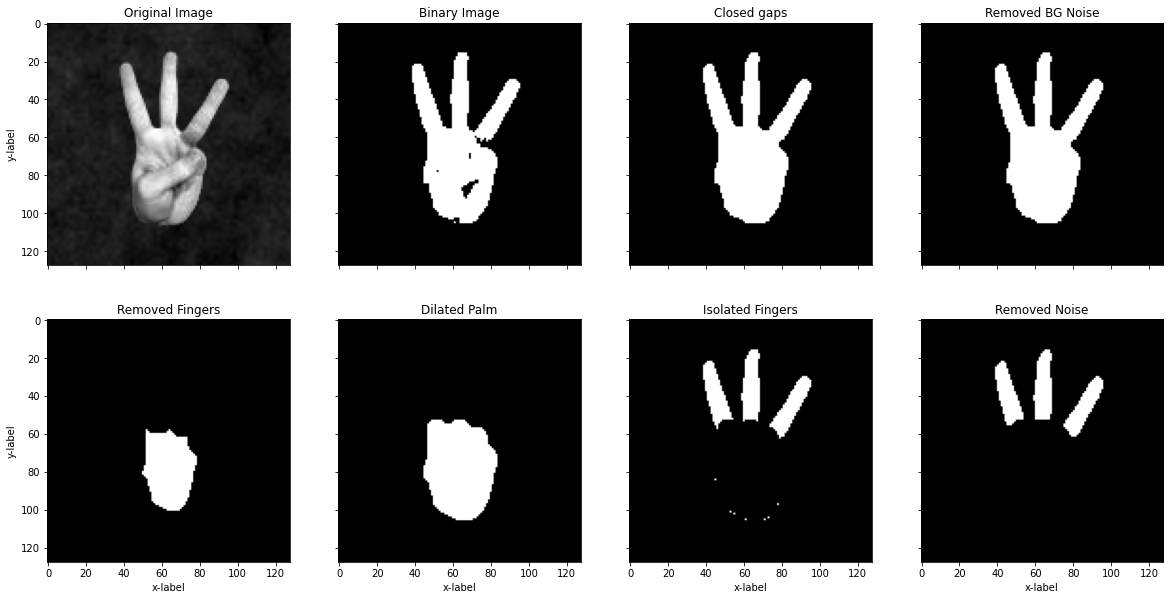

In [29]:
f=io.imread("dataset-hands/dataset-finger-count-0to5/test/3/"+"0f0198b0-ae2b-4787-a700-6cd48a8ccee5.png")
BWf=np.invert(toBinary(f))
Closef=CloseGaps(BWf)
Openf=RemoveBackNoise(Closef)
Erodef=ErodeFingers(Openf)
Dilatef=DilatePalm(Erodef)
Fingersf=Finger(Openf,Dilatef)
RemNFingersf=RemoveNoise(Fingersf)
CountedFingers=CountFingers(RemNFingersf)

fig, axs = plt.subplots(2, 4)
fig.set_figwidth(20)
fig.set_figheight(10)
axs[0, 0].imshow(f,cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 1].imshow(BWf,cmap='gray')
axs[0, 1].set_title("Binary Image")
axs[0,2].imshow(Closef,cmap='gray')
axs[0,2].set_title("Closed gaps")
axs[0,3].imshow(Openf,cmap='gray')
axs[0,3].set_title("Removed BG Noise")
axs[1, 0].imshow(Erodef,cmap='gray')
axs[1, 0].set_title("Removed Fingers")
axs[1, 1].imshow(Dilatef,cmap='gray')
axs[1, 1].set_title("Dilated Palm")
axs[1,2].imshow(Fingersf,cmap='gray')
axs[1,2].set_title("Isolated Fingers")
axs[1,3].imshow(RemNFingersf,cmap='gray')
axs[1,3].set_title("Removed Noise")

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

for ax in axs.flat:
    ax.label_outer()
    
plt.plot()

print("True Number of Fingers: 3")
print("Counted Number of Fingers: "+ str(CountedFingers))

## Processing Images

The directory in which the images are has a file structure where the true finger counts are the folder names (0 to 5) and they each contain 600 images. We shall read the images folder by folder and then compare their result to the true value 

In [30]:
hit=np.zeros(6)
miss=np.zeros(6)

In [31]:
for num_fingers in range(0,6):
    for image in os.listdir("dataset-hands/dataset-finger-count-0to5/test/"+str(num_fingers)):
        f=io.imread("dataset-hands/dataset-finger-count-0to5/test/"+str(num_fingers)+"/"+image)
        BWf=np.invert(toBinary(f))
        Closef=CloseGaps(BWf)
        Openf=RemoveBackNoise(Closef)
        Erodef=ErodeFingers(Openf)
        Dilatef=DilatePalm(Erodef)
        Fingersf=Finger(Openf,Dilatef)
        Fingersf=RemoveNoise(Fingersf)
        CountedFingers=CountFingers(Fingersf)
        if(CountedFingers==num_fingers):
            hit[num_fingers]+=1
        else:
            miss[num_fingers]+=1


## Results

In [32]:
print(hit)

[430. 362. 323. 582. 517. 599.]


In [33]:
print(miss)

[170. 238. 277.  18.  83.   1.]


In [34]:
acc=np.zeros(6)
for i in range(len(hit)):
    acc[i]=round((hit[i]/(hit[i]+miss[i]))*100,2)
print(acc)

[71.67 60.33 53.83 97.   86.17 99.83]


<function matplotlib.pyplot.show(close=None, block=None)>

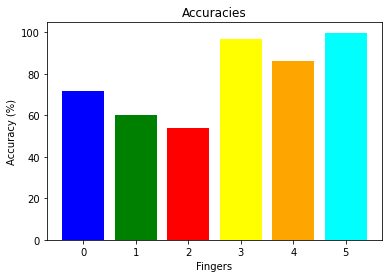

In [35]:
plt.bar(range(len(acc)),acc, color=["blue","green","red","yellow","orange","cyan"])
plt.title("Accuracies")
plt.xlabel("Fingers")
plt.ylabel("Accuracy (%)")
plt.show

In [36]:
results=PrettyTable()
results.field_names=["True Number of fingers","Correct Counts","Incorrect Counts", "Accuracy"]
for i in range(len(acc)):
    results.add_row([str(i),str(hit[i]),str(miss[i]),str(acc[i])])
print(results)

+------------------------+----------------+------------------+----------+
| True Number of fingers | Correct Counts | Incorrect Counts | Accuracy |
+------------------------+----------------+------------------+----------+
|           0            |     430.0      |      170.0       |  71.67   |
|           1            |     362.0      |      238.0       |  60.33   |
|           2            |     323.0      |      277.0       |  53.83   |
|           3            |     582.0      |       18.0       |   97.0   |
|           4            |     517.0      |       83.0       |  86.17   |
|           5            |     599.0      |       1.0        |  99.83   |
+------------------------+----------------+------------------+----------+
